In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'E:\Internships\CSVs\7ALTE.csv')

In [3]:
X = df[[ 'PRBUsageUL', 'PRBUsageDL','meanThr_DL', 'meanThr_UL', 'maxThr_DL', 'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL']]

y = df['Unusual']

In [4]:
# Split dataset into training set and test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)  

In [5]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=12, min_samples_leaf=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=5)

In [10]:
# Make predictions on new data
predictions = tree.predict(X_val)

In [11]:
# Evaluate performance on validation set
score = tree.score(X_val, y_val)
print('Validation score:', score)

Validation score: 0.9660493827160493


In [12]:
#Confusion Matrix of Validation Class
print(confusion_matrix(y_val, predictions))

[[227   5]
 [  6  86]]


In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y)

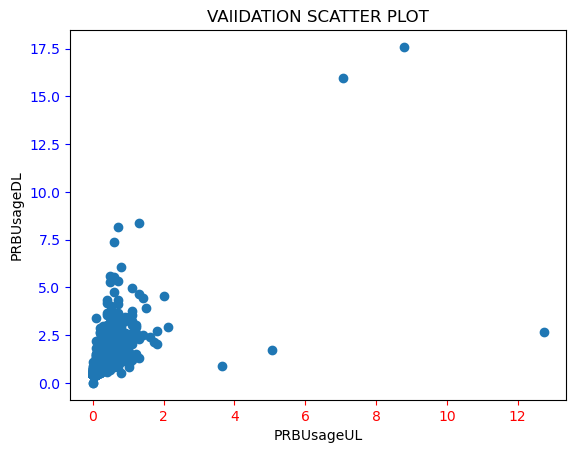

In [14]:
fig, ax = plt.subplots()
ax.scatter(X['PRBUsageUL'], X['PRBUsageDL'])
ax.set_xlabel('PRBUsageUL')
ax.set_ylabel('PRBUsageDL')
ax.tick_params(axis='x', colors='r')
ax.tick_params(axis='y', colors='b')
ax.set_title('VAlIDATION SCATTER PLOT')
plt.show()

In [16]:
# CLASSIFICATION REPORT OF VALIDATION
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       232
           1       0.95      0.93      0.94        92

    accuracy                           0.97       324
   macro avg       0.96      0.96      0.96       324
weighted avg       0.97      0.97      0.97       324



In [7]:
# Save model
with open('tree.pkl', 'wb') as f:
    pickle.dump(tree, f)